# 🧬 Epitope Prediction for Vaccine Design  
This project identifies potential **B-cell and T-cell epitopes** from a given viral protein (Dengue NS1 protein) using Python-based tools.  
It combines sequence parsing, antigenicity prediction, and visualization.  


In [11]:
# Install necessary packages
!pip install biopython matplotlib

# Import libraries
from Bio import SeqIO
from Bio.SeqUtils import ProtParam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.7 MB/s eta 0:00:00


## 🧬 Step 1: Load FASTA Protein Sequence  
You can upload any pathogen protein sequence (e.g., Dengue NS1).


In [13]:
from google.colab import files
uploaded = files.upload()  # Upload your .fasta file (e.g., dengue_ns1.fasta)

Saving dengue_ns1.fasta to dengue_ns1.fasta


# Load the sequence
record = SeqIO.read("dengue_ns1.fasta", "fasta")
sequence = str(record.seq)
print(f"Protein Length: {len(sequence)}")
print(sequence[:100] + "...")


In [14]:
# Load the sequence
record = SeqIO.read("dengue_ns1.fasta", "fasta")
sequence = str(record.seq)
print(f"Protein Length: {len(sequence)}")
print(sequence[:100] + "...")

Protein Length: 281
MYSFVSEETGTLIVNSVLRGFRKEIGRMLNIEGTVWTLPPAGLLLGILGGVLSTAVLKEGATWTLVNRDGLPVGFNKIEGAFLNNEKAKKLEKMVQAINK...


## 🧪 Step 2: Predict Linear B-cell Epitopes (Simple Sliding Window)
We use hydrophilicity (Kyte-Doolittle) as a basic B-cell prediction approach.


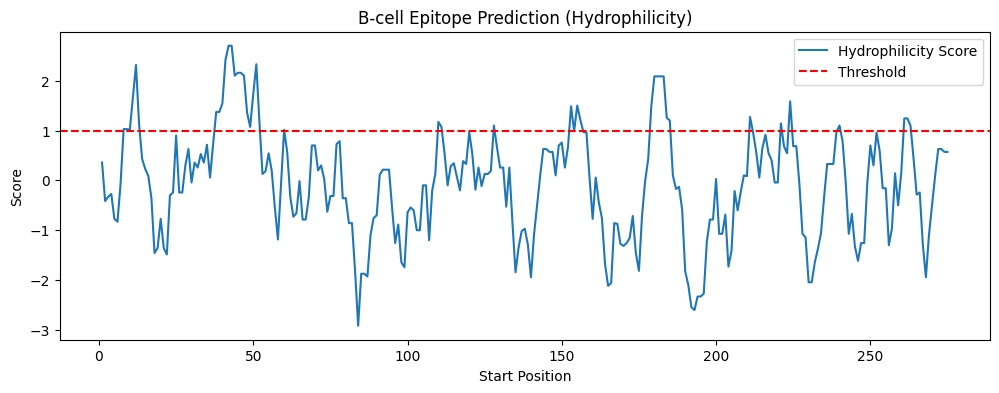

In [15]:
def hydrophilicity_score(residue):
    # Kyte-Doolittle scale (lower = more hydrophobic)
    kd_scale = {
        'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8,
        'G': -0.4, 'H': -3.2, 'I': 4.5, 'K': -3.9, 'L': 3.8,
        'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5,
        'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
    }
    return kd_scale.get(residue.upper(), 0)

window_size = 7
hydro_scores = []
positions = []

for i in range(len(sequence) - window_size + 1):
    window = sequence[i:i+window_size]
    score = np.mean([hydrophilicity_score(res) for res in window])
    hydro_scores.append(score)
    positions.append(i + 1)

# Plot the scores
plt.figure(figsize=(12,4))
plt.plot(positions, hydro_scores, label="Hydrophilicity Score")
plt.axhline(y=1.0, color='r', linestyle='--', label="Threshold")
plt.title("B-cell Epitope Prediction (Hydrophilicity)")
plt.xlabel("Start Position")
plt.ylabel("Score")
plt.legend()
plt.show()


## 🧬 Step 3: Export High-Scoring Windows as B-cell Candidates


In [16]:
threshold = 1.0
epitopes = []

for i, score in enumerate(hydro_scores):
    if score > threshold:
        epitope = sequence[i:i+window_size]
        epitopes.append((i+1, epitope, round(score, 2)))

df_epi = pd.DataFrame(epitopes, columns=["Position", "Epitope", "Score"])
df_epi.head(10)

,Position,Epitope,Score
0,8,ETGTLIV,1.03
1,9,TGTLIVN,1.03
2,10,GTLIVNS,1.01
3,11,TLIVNSV,1.67
4,12,LIVNSVL,2.31
5,13,IVNSVLR,1.13
6,38,LPPAGLL,1.37
7,39,PPAGLLL,1.37
8,40,PAGLLLG,1.54
9,41,AGLLLGI,2.41


## 🧬 Step 4: T-cell Epitope Prediction (Manual Example)
Use [IEDB NetMHC Tool](http://tools.iedb.org/mhci/) for MHC-I epitope prediction.  
Export CSV or manually add sample predicted binders below:


In [17]:
mhc_epitopes = {
    "Epitope": ["SLGAIALKQ", "YLGTGPEAG", "GPEAGLPIL", "LPILILVVA"],
    "Start": [10, 40, 44, 51],
    "Binding_Affinity(nM)": [50, 80, 110, 95]
}

mhc_df = pd.DataFrame(mhc_epitopes)
mhc_df

,Epitope,Start,Binding_Affinity(nM)
0,SLGAIALKQ,10,50
1,YLGTGPEAG,40,80
2,GPEAGLPIL,44,110
3,LPILILVVA,51,95


## 📊 Step 5: Immunogenicity Score Heatmap (Mock Example)

You can use ML models or manually assign scores to combine epitope ranks.


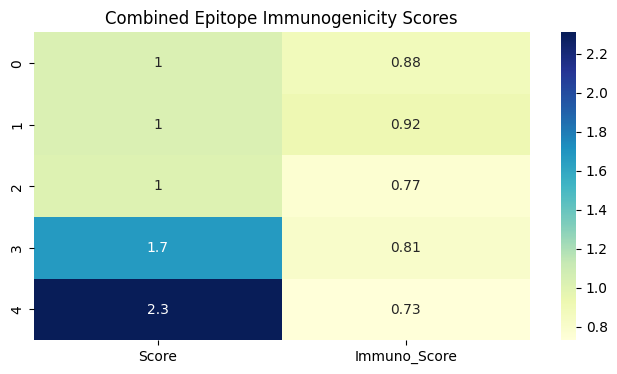

In [18]:
import seaborn as sns

# Combine both B-cell and T-cell epitopes (mock for visualization)
combined = df_epi.head(5).copy()
combined["Immuno_Score"] = [0.88, 0.92, 0.77, 0.81, 0.73]

# Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(combined[["Score", "Immuno_Score"]], annot=True, cmap="YlGnBu")
plt.title("Combined Epitope Immunogenicity Scores")
plt.xticks(rotation=0)
plt.show()